In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import uuid
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker
fake = Faker()

# Constants
TOTAL_ROWS = 1000
NUM_FRAUD_ROWS = 100  # Total fraudulent rows
NUM_FRAUD_IDS = 50     # Number of unique fraudulent IDs
FRAUD_DUPLICATES = 2   # Number of duplicates per fraud ID (2 for pairing)

# Event and ticket category lists
EVENTS = [
    "Concert A",
    "Concert B",
    "Sports Event A",
    "Sports Event B",
    "Festival A",
    "Festival B",
    "Theater A",
    "Theater B"
]
TICKET_CATEGORIES = ["VIP", "General", "Balcony", "Standing", "Premium", "Economy"]

def generate_wallet_address():
    """Generates a fake Ethereum-like wallet address."""
    return '0x' + ''.join(np.random.choice(list('0123456789abcdef'), size=40))

def generate_event_timestamp():
    """Generates a random event timestamp between Jan 1, 2025 and Dec 31, 2025."""
    start_date = datetime(2025, 1, 1)
    end_date = datetime(2025, 12, 31, 23, 59, 59)
    return fake.date_time_between(start_date=start_date, end_date=end_date)

def generate_transaction_timestamp(event_time):
    """Generates a transaction timestamp before the event timestamp."""
    # Ensure the transaction is at least 1 hour before the event and at most 30 days before
    min_delta = timedelta(hours=1)
    max_delta = timedelta(days=30)
    delta_seconds = np.random.randint(int(min_delta.total_seconds()), int(max_delta.total_seconds()))
    delta = timedelta(seconds=delta_seconds)
    transaction_time = event_time - delta
    return transaction_time

# -- Step 1: Generate a Single Organizer Wallet Address --
organizer_wallet = generate_wallet_address()

# Initialize data dictionary
data = {
    "ID": [],
    "event_timestamp": [],
    "transaction_timestamp": [],
    "event": [],
    "ticket_price": [],
    "ticket_category": [],
    "buyer_wallet_address": [],
    "seller_wallet_address": [],
    "organizer_wallet_address": []
}

# -- Step 2: Generate Fraudulent Transactions --
for _ in range(NUM_FRAUD_IDS):
    # Generate a unique fraudulent ID
    fraud_id = str(uuid.uuid4())

    # Select a random event
    event = np.random.choice(EVENTS)

    # Generate a single event timestamp
    event_time = generate_event_timestamp()

    # Generate a base transaction timestamp
    base_transaction_time = generate_transaction_timestamp(event_time)

    for _ in range(FRAUD_DUPLICATES):
        # Append the same ID for fraud
        data["ID"].append(fraud_id)

        # Event details
        data["event"].append(event)
        data["event_timestamp"].append(event_time)

        # For fraudulent transactions, introduce slight variations in transaction timestamp
        # To simulate duplicate or near-duplicate timestamps, add small random seconds
        variation_seconds = np.random.randint(0, 60)  # Up to 1 minute difference
        transaction_time = base_transaction_time + timedelta(seconds=variation_seconds)
        data["transaction_timestamp"].append(transaction_time)

        # Ticket price (can vary slightly)
        ticket_price = round(np.random.uniform(50, 500), 2)
        data["ticket_price"].append(ticket_price)

        # Ticket category
        ticket_category = np.random.choice(TICKET_CATEGORIES)
        data["ticket_category"].append(ticket_category)

        # Different buyer wallets for each fraud transaction
        buyer_wallet = generate_wallet_address()
        data["buyer_wallet_address"].append(buyer_wallet)

        # Seller wallet: Must differ from organizer_wallet
        while True:
            seller_wallet = generate_wallet_address()
            if seller_wallet != organizer_wallet:
                break
        data["seller_wallet_address"].append(seller_wallet)

        # Organizer wallet: Same for all rows
        data["organizer_wallet_address"].append(organizer_wallet)

# -- Step 3: Generate Legitimate Transactions --
NUM_LEGIT_ROWS = TOTAL_ROWS - NUM_FRAUD_ROWS  # 900

for _ in range(NUM_LEGIT_ROWS):
    # Generate unique ID
    legit_id = str(uuid.uuid4())
    data["ID"].append(legit_id)

    # Select a random event
    event = np.random.choice(EVENTS)
    data["event"].append(event)

    # Generate event timestamp
    event_time = generate_event_timestamp()
    data["event_timestamp"].append(event_time)

    # Generate transaction timestamp
    transaction_time = generate_transaction_timestamp(event_time)
    data["transaction_timestamp"].append(transaction_time)

    # Generate ticket price (e.g., between 50 to 500 units)
    ticket_price = round(np.random.uniform(50, 500), 2)
    data["ticket_price"].append(ticket_price)

    # Select a random ticket category
    ticket_category = np.random.choice(TICKET_CATEGORIES)
    data["ticket_category"].append(ticket_category)

    # Generate buyer wallet
    buyer_wallet = generate_wallet_address()
    data["buyer_wallet_address"].append(buyer_wallet)

    # Seller wallet: 
    # For legitimate transactions, assume seller is the organizer
    seller_wallet = organizer_wallet  # Seller is the organizer
    data["seller_wallet_address"].append(seller_wallet)

    # Organizer wallet: Same for all rows
    data["organizer_wallet_address"].append(organizer_wallet)

# -- Step 4: Create DataFrame --
df = pd.DataFrame(data)

# -- Step 5: Shuffle the DataFrame --
# To mix fraudulent and legitimate transactions
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

# -- Step 6: Sort by transaction timestamp --
df = df.sort_values(by="transaction_timestamp").reset_index(drop=True)

# -- Step 7: Save to CSV --
df.to_csv("fake_blockchain_transactions_with_fraud.csv", index=False)



In [2]:
df.head(5)

,ID,event_timestamp,transaction_timestamp,event,ticket_price,ticket_category,buyer_wallet_address,seller_wallet_address,organizer_wallet_address
0,144fbf3f-7dcd-4aa6-a9ee-2058344f24ee,2025-01-01 19:45:52,2024-12-04 11:25:51,Sports Event A,173.11,Premium,0xbdf4740aa099d3595777e7177c0a75de8219f992,0xb602999de3795567ad031e8145556322b19bafd8,0xb602999de3795567ad031e8145556322b19bafd8
1,d0f63cdc-8146-40f6-83cf-d847a70ac55c,2025-01-02 00:26:36,2024-12-04 17:41:55,Sports Event B,286.01,Economy,0xd52dfb7e4e010fdcfa53a258c87d2733f7d4de94,0xb602999de3795567ad031e8145556322b19bafd8,0xb602999de3795567ad031e8145556322b19bafd8
2,5ea77004-7823-451d-93d8-add1c50cac18,2025-01-01 19:10:51,2024-12-06 15:15:43,Festival A,413.74,Balcony,0x92ea4bfda0c681ea2b3e9dd124bd2d3589593dbf,0xb602999de3795567ad031e8145556322b19bafd8,0xb602999de3795567ad031e8145556322b19bafd8
3,a686bc6b-bf2b-433c-ae13-e59661f075f8,2025-01-01 09:32:36,2024-12-09 10:03:16,Festival B,224.06,Premium,0xff823e89c688e1d6f8dbceed13db4763e0dcc548,0xb602999de3795567ad031e8145556322b19bafd8,0xb602999de3795567ad031e8145556322b19bafd8
4,abb25951-b71b-4e00-bb5e-b25934f1a610,2025-01-05 22:42:19,2024-12-09 17:05:12,Festival B,496.60,Standing,0x9a8a133e7e548794f30c38d2675f4fff28147f53,0xb602999de3795567ad031e8145556322b19bafd8,0xb602999de3795567ad031e8145556322b19bafd8


In [3]:
# condition to identify fraud event is same ID, timestamp arounf 1 minute, diffeent wallet buyers and wallet seller different from organizer 

In [4]:
# --------------------------------------------
# Identify Duplicate IDs
# --------------------------------------------

# Identify IDs that appear more than once
duplicate_ids = df['ID'].value_counts()[df['ID'].value_counts() > 1].index.tolist()

print(f"Total duplicate IDs (potential fraud cases): {len(duplicate_ids)}")

# --------------------------------------------
# Analyze Transactions with Duplicate IDs
# --------------------------------------------

# Define the time window for similar timestamps (e.g., 1 minute)
TIME_WINDOW = timedelta(minutes=1)

def is_fraudulent(group):
    """
    Determines if a group of transactions with the same ID is fraudulent based on:
    1. Transactions are within TIME_WINDOW of each other.
    2. All buyer_wallet_addresses are unique.
    3. seller_wallet_address differs from organizer_wallet_address.
    """
    # Check if all transaction timestamps are within TIME_WINDOW
    min_time = group['transaction_timestamp'].min()
    max_time = group['transaction_timestamp'].max()
    time_diff = max_time - min_time
    if time_diff > TIME_WINDOW:
        return False

    # Check if all buyer_wallet_addresses are unique
    if group['buyer_wallet_address'].nunique() != len(group):
        return False

    # Check if seller_wallet_address differs from organizer_wallet_address for all transactions
    if not all(group['seller_wallet_address'] != group['organizer_wallet_address']):
        return False

    return True

# --------------------------------------------
# Flagging Fraudulent Transactions
# --------------------------------------------

# Initialize a column to flag fraudulent transactions
df['is_fraud'] = False

# Group the DataFrame by ID
grouped = df.groupby('ID')

# Apply the fraud detection function
for fraud_id in duplicate_ids:
    group = grouped.get_group(fraud_id)
    if is_fraudulent(group):
        df.loc[df['ID'] == fraud_id, 'is_fraud'] = True

# Count the number of frauds detected
frauds_detected = df[df['is_fraud']].shape[0]
print(f"Total fraudulent transactions detected: {frauds_detected}")

# --------------------------------------------
# Summary and Output
# --------------------------------------------

# Summary
total_transactions = df.shape[0]
legit_transactions = total_transactions - frauds_detected

print("\n--- Fraud Detection Summary ---")
print(f"Total Transactions: {total_transactions}")
print(f"Legitimate Transactions: {legit_transactions}")
print(f"Fraudulent Transactions: {frauds_detected}")

# Display sample fraudulent transactions
print("\nSample Fraudulent Transactions:")
df[df['is_fraud']].head(10)


Total duplicate IDs (potential fraud cases): 50
Total fraudulent transactions detected: 100

--- Fraud Detection Summary ---
Total Transactions: 1000
Legitimate Transactions: 900
Fraudulent Transactions: 100

Sample Fraudulent Transactions:


,ID,event_timestamp,transaction_timestamp,event,ticket_price,ticket_category,buyer_wallet_address,seller_wallet_address,organizer_wallet_address,is_fraud
11,e0d3df39-280e-45ad-8c9a-f9e679024ba2,2025-01-10 06:12:28,2024-12-14 21:40:54,Festival A,286.85,VIP,0x1c6d1b5d1591295a165c2b600d1a8313c15de21f,0x3898b2de3146a6be06cd9c8152f1b1466bde2cbc,0xb602999de3795567ad031e8145556322b19bafd8,True
12,e0d3df39-280e-45ad-8c9a-f9e679024ba2,2025-01-10 06:12:28,2024-12-14 21:40:58,Festival A,236.42,General,0xf1a3987dfa82248a6960a98d7f847d54e053bf11,0x2c3a064a86ed2236b461aa34338ae59699232ce2,0xb602999de3795567ad031e8145556322b19bafd8,True
55,d83a0e72-07c2-45df-8e7f-987d3fbf2f58,2025-01-25 13:29:03,2025-01-07 10:40:43,Sports Event A,164.69,Balcony,0x90ca5560aba0b8fff64a6bd44d37afec0fa85b4e,0xe2c7ed9ca0517511a719c2ca6df7cd42bea6edb7,0xb602999de3795567ad031e8145556322b19bafd8,True
56,d83a0e72-07c2-45df-8e7f-987d3fbf2f58,2025-01-25 13:29:03,2025-01-07 10:41:04,Sports Event A,429.68,Standing,0x057f341f4df8362038f7214fa296d9d70c4ef4bf,0x721904755a67a5c7f151560ef08088d32fe3f3d1,0xb602999de3795567ad031e8145556322b19bafd8,True
81,c78d8cd9-87ad-4140-b676-879eaccfcba6,2025-02-09 18:33:57,2025-01-16 14:44:12,Concert B,229.65,Premium,0xb4516e7da0852313c6f60b625ddad2716c59be84,0x4c9fbebfcf485b1089a649325324d8b41e490d10,0xb602999de3795567ad031e8145556322b19bafd8,True
82,c78d8cd9-87ad-4140-b676-879eaccfcba6,2025-02-09 18:33:57,2025-01-16 14:44:55,Concert B,152.61,General,0xf5b549e0c9c356f1f12cd4db3c51f3f089fc2ff4,0x57c1a5c36b6ec4edd4fc9daacd32ba8d0009ce9b,0xb602999de3795567ad031e8145556322b19bafd8,True
126,8e341db9-cd9b-47f4-b3c9-66ef00b8cdb3,2025-03-03 08:40:40,2025-02-02 11:30:40,Sports Event B,85.54,VIP,0x7d8cb3d7a529803d5ca6e743c57b6da3dce55094,0xa9b209219994ee87c99101459b0d4d0565e0813e,0xb602999de3795567ad031e8145556322b19bafd8,True
127,8e341db9-cd9b-47f4-b3c9-66ef00b8cdb3,2025-03-03 08:40:40,2025-02-02 11:30:59,Sports Event B,326.76,Standing,0x0b6c7110c9fac3cdfdc951a03d313bcc9d4d14c1,0xd68a433d0901f4c0d5b00c22f8c9c3e66697f84a,0xb602999de3795567ad031e8145556322b19bafd8,True
138,7a21478f-1bdf-4255-aa71-a6640bd3d8ad,2025-02-22 10:40:25,2025-02-05 00:49:38,Concert B,431.05,VIP,0x2197147a2d60196c2eb0c6151e2410a259dab4c1,0x8051a57a413e24d3052dd04430edbf364999def2,0xb602999de3795567ad031e8145556322b19bafd8,True
139,7a21478f-1bdf-4255-aa71-a6640bd3d8ad,2025-02-22 10:40:25,2025-02-05 00:50:03,Concert B,317.21,Economy,0x5ee5b4fe5e94ebb070cf9bfa3409d2ccb271bcd5,0x3eff8fe7a3d238776b032d12e78867cdcbeef602,0xb602999de3795567ad031e8145556322b19bafd8,True


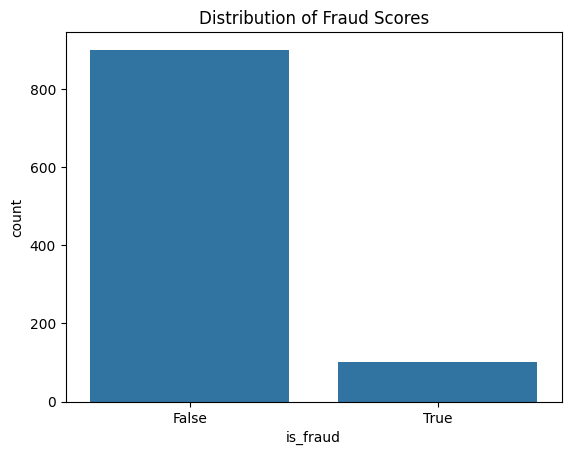

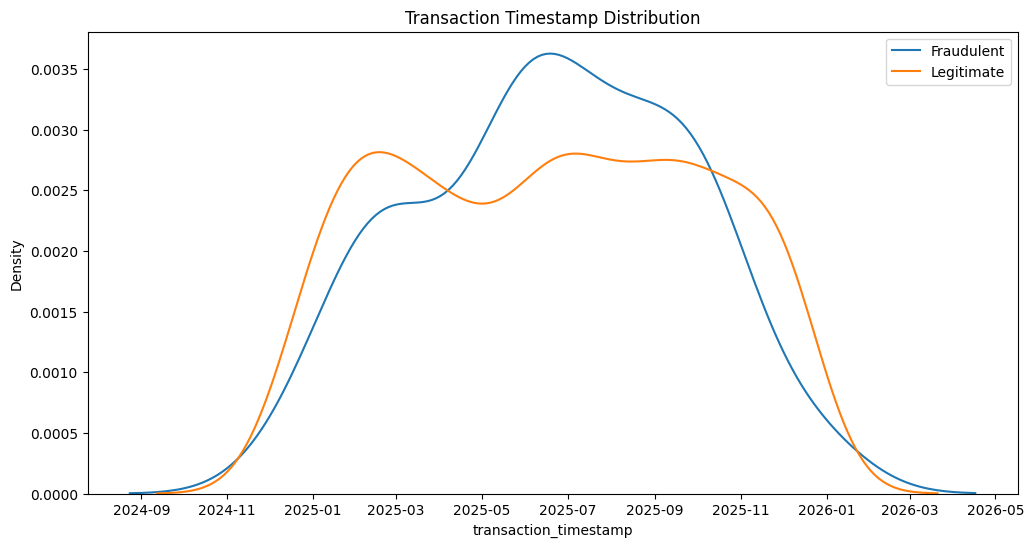

In [5]:
# Example: Distribution of fraud scores
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraud Scores')
plt.show()

# Example: Timestamps of fraudulent vs legitimate transactions
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['is_fraud']]['transaction_timestamp'], label='Fraudulent')
sns.kdeplot(df[~df['is_fraud']]['transaction_timestamp'], label='Legitimate')
plt.title('Transaction Timestamp Distribution')
plt.legend()
plt.show()